In [707]:
# Ahmadsho Akdodshoev
# Intro to ML - Assignment 1

# 1. Practical

## 1.1 Preprocessing

### 1.1.1 Encoding categorical values

In [708]:
DATA_PATH = 'a1_dataset.csv'
ENCODED_DATA_PATH = "a1_encoded_dataset.csv"

In [709]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [710]:
dataset = pd.read_csv(DATA_PATH)

import imp
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

var3 = "var3"
var6 = "var6"

# define ordinal encoding
ordinalEncoding = OrdinalEncoder()
x = dataset[var6].values
dataset[var6] = ordinalEncoding.fit_transform(x.reshape(-1, 1))

# define one hot encoding
oneHotEncoder = OneHotEncoder(sparse=False)
onehotVar3 = oneHotEncoder.fit_transform(dataset[[var3]])

data = pd.DataFrame(onehotVar3)
data


,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,235
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Using one hot encoding on var3 resulted in poor performance, polynomial regression of 3rd degree does not compute on my machine, since it introduced over 200 new columns. So let us use **target encoding** for var3 

$$\eta = \text{MinMaxScaler}\left(\frac{\text{\# of occurrence of target of a country} + \text{my\_noise(country)}}{\text{\# of occurrence of a country}}\right)$$

In [711]:
from sklearn.preprocessing import MinMaxScaler


pt = pd.pivot_table(dataset, index='var3', values='target', aggfunc=['count', np.sum])
contr_names = sorted(dataset["var3"].unique())
# print(contr_names)

contr_names_hash = []

for name in contr_names:
    ascii_sum = 0
    for char in name:
        ascii_sum += ord(char)
    
    contr_names_hash.append(ascii_sum/len(contr_names)/len(contr_names))        


contr_names_hash = np.array(contr_names_hash)
# print(contr_names_hash)

# print(control_names.)
np_pt = pt.values
np_pt = np_pt.T

# print(type(np_pt[1]))

targs = (np_pt[1]+contr_names_hash)/np_pt[0]

min_max_scaler = MinMaxScaler()
targs_normal = min_max_scaler.fit_transform(targs.reshape(-1,1))

# print(targs_normal)
# print(len(contr_names), len(targs_normal))

name_dic = dict()

for (name,tr) in zip(contr_names, targs_normal):
    name_dic[name] = tr[0]


var3 = dataset["var3"].copy()
var3_vals = var3.values

new_var3_vals = []

for var3_val in var3_vals:
    new_var3_vals.append(name_dic[var3_val])

print(type(var3_vals))
new_var3_vals = np.array(new_var3_vals)
new_var3_vals
dataset["var3"] =new_var3_vals

dataset
# dataset
# print(name_dic)




<class 'numpy.ndarray'>


,target,var1,var2,var3,var4,var5,var6,var7
0,0,509.18,417.681,0.396573,138.0,393.00,0.0,2019-07-20 13:21:37
1,0,446.06,666.182,0.232676,81.0,352.05,1.0,2019-04-04 21:30:46
2,1,235.50,398.097,0.311534,90.0,339.00,0.0,2019-03-03 02:59:37
3,0,306.02,518.163,0.465359,102.0,439.25,1.0,2019-03-19 08:00:58
4,0,453.08,600.156,0.001372,105.0,422.95,0.0,2019-03-18 13:22:35
...,...,...,...,...,...,...,...,...
920,0,422.34,547.259,0.462020,NaN,350.45,1.0,2019-01-22 12:58:14
921,1,342.62,473.919,0.462067,NaN,200.85,0.0,2019-02-01 14:37:34
922,1,265.10,538.170,0.464850,NaN,208.35,1.0,2019-06-13 18:50:00
923,0,397.12,622.386,0.461561,NaN,433.45,1.0,2019-05-27 06:19:27


Saved the encoded dataset as a scv file

In [712]:
# f = open(ENCODED_DATA_PATH, "w")
dataset.to_csv(ENCODED_DATA_PATH)

### 1.1.2 Data imputation

Reading the encoded data and separating the non-NaN rows from the NaN rows 

In [713]:
dataset = pd.read_csv(ENCODED_DATA_PATH)
dataset = dataset.iloc[:, 1:]

target = dataset["target"]

dataset.drop("target", axis=1, inplace=True)
dataset = dataset.drop("var7", axis=1)

data = dataset[~dataset["var4"].isna()]
data_nan = dataset[dataset["var4"].isna()]
y_4 = data["var4"].copy()
data.drop("var4", axis=1, inplace=True)

/tmp/ipykernel_6633/4271639080.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop("var4", axis=1, inplace=True)


Splitting the non-NaN rows into train and test data

In [714]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y_4, test_size=0.2, random_state=1)

dataset that will be imputed using Linear regression:

In [715]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()


linear_regression.fit(X_train, y_train)

y_pred_lin = linear_regression.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lin})
print(df)

# stats for linear


     Actual   Predicted
139    87.0   97.507443
232    96.0   92.600484
213    78.0   94.387552
184    60.0  100.568061
138    99.0   96.837032
..      ...         ...
90     99.0   92.505150
158    87.0  119.738820
249   147.0  122.847044
313    93.0   90.841899
14    132.0  124.304358

[65 rows x 2 columns]


In [716]:
# from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

SCORING = 'accuracy'
# CV = KFold(n_splits=3, random_state=1, shuffle=True)

In [717]:
from pandas import DataFrame
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

def best_ridge(X_train, y_train):
    grid_values = {'alpha': [0.001,0.01,0.1,1,10,100,1000]}
    
    ridge_searcher = GridSearchCV(estimator=Ridge(), param_grid=grid_values, cv=3, scoring="neg_mean_squared_error")
    
    ridge_searcher.fit(X_train, y_train)
    ridge_est = ridge_searcher.best_estimator_
    
    return ridge_est    

In [718]:
from sklearn.linear_model import Ridge

ridge_regression = best_ridge(X_train, y_train)


y_pred_ridge = ridge_regression.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ridge})
print(df)

     Actual   Predicted
139    87.0   97.383493
232    96.0   93.166561
213    78.0   94.668948
184    60.0  100.928219
138    99.0   96.791257
..      ...         ...
90     99.0   92.575921
158    87.0  119.912740
249   147.0  122.250816
313    93.0   91.387306
14    132.0  124.116654

[65 rows x 2 columns]


Dataset that will be imputed using Polynomial regression (3rd degree):

In [719]:
from sklearn.preprocessing import PolynomialFeatures

poly  = PolynomialFeatures(degree=3)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.transform(X_test)

poly_X_test = poly_X_test.round(3)
poly_X_train = poly_X_train.round(3)

poly_regression = LinearRegression()
poly_regression.fit(poly_X_train, y_train)

y_pred_poly = poly_regression.predict(poly_X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_poly})
print(df)

# stats for polynomial


     Actual   Predicted
139    87.0   88.306248
232    96.0  107.721128
213    78.0   65.852437
184    60.0   48.824368
138    99.0  108.695197
..      ...         ...
90     99.0  101.389995
158    87.0  117.877174
249   147.0  121.818854
313    93.0  100.525993
14    132.0  129.317023

[65 rows x 2 columns]


In [720]:
poly_ridge_regression = best_ridge(poly_X_train, y_train)

print(poly_X_test)

y_pred_poly_ridge = poly_ridge_regression.predict(poly_X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_poly_ridge})
print(df)


[[1.0000000e+00 4.6722000e+02 6.3109700e+02 ... 1.3645636e+05
  3.6940000e+02 1.0000000e+00]
 [1.0000000e+00 3.5556000e+02 5.0216000e+02 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 4.3532000e+02 5.6593800e+02 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [1.0000000e+00 2.7048000e+02 6.7431000e+02 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 4.8518000e+02 6.6177000e+02 ... 1.1478544e+05
  3.3880000e+02 1.0000000e+00]
 [1.0000000e+00 2.3074000e+02 5.7594700e+02 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
     Actual   Predicted
139    87.0   85.739558
232    96.0  108.902794
213    78.0   69.769999
184    60.0   59.770235
138    99.0  107.691999
..      ...         ...
90     99.0  101.537450
158    87.0  119.935486
249   147.0  125.610707
313    93.0  101.379087
14    132.0  128.230671

[65 rows x 2 columns]


/home/yy7/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.48213e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yy7/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.44471e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yy7/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.59381e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yy7/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.48213e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/yy7/.local/lib/python3.10/site-packages/sklearn/linear_mod

Metrics for each method:

In [721]:
from sklearn import metrics

def print_metrics(y_test, y_pred):
    print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('Linear regression:')
print_metrics(y_test, y_pred_lin)

print('\nRidge regression')
print_metrics(y_test, y_pred_ridge)

print('\nLinear regression with polynomial coefficients')
print_metrics(y_test, y_pred_poly)

print('\nRidge regression with polynomial coefficients')
print_metrics(y_test, y_pred_poly_ridge)

Linear regression:
Mean Absolute Percentage Error: 0.20857816568862142
Mean Absolute Error: 20.07156865285017
Mean Squared Error: 583.6907964126054
Root Mean Squared Error: 24.159693632424347

Ridge regression
Mean Absolute Percentage Error: 0.20860892513670884
Mean Absolute Error: 20.069495142515294
Mean Squared Error: 583.4407476014106
Root Mean Squared Error: 24.15451816123457

Linear regression with polynomial coefficients
Mean Absolute Percentage Error: 0.14921567818592088
Mean Absolute Error: 15.436999813574154
Mean Squared Error: 495.9008222581229
Root Mean Squared Error: 22.268830733968116

Ridge regression with polynomial coefficients
Mean Absolute Percentage Error: 0.13855011333612813
Mean Absolute Error: 14.470913603020465
Mean Squared Error: 467.0007066473947
Root Mean Squared Error: 21.610199134838965


Putting lost values of var4 and saving the encoded data to a csv file

In [722]:
# X_pred = data_nan.drop("var4", axis=1)
# X_pred = poly.fit_transform(X_pred)
# y_pred = poly_ridge_regression.predict(X_pred)

y_pred = ridge_regression.predict(data_nan.drop("var4", axis=1))
y_pred = y_pred.round(0)

data["var4"] = y_4
data_nan["var4"] = y_pred
dataset = pd.concat([data, data_nan])
dataset["target"] = target

print(dataset)
dataset.to_csv(ENCODED_DATA_PATH)

       var1     var2      var3    var5  var6   var4  target
0    509.18  417.681  0.396573  393.00   0.0  138.0       0
1    446.06  666.182  0.232676  352.05   1.0   81.0       0
2    235.50  398.097  0.311534  339.00   0.0   90.0       1
3    306.02  518.163  0.465359  439.25   1.0  102.0       0
4    453.08  600.156  0.001372  422.95   0.0  105.0       0
..      ...      ...       ...     ...   ...    ...     ...
920  422.34  547.259  0.462020  350.45   1.0  103.0       0
921  342.62  473.919  0.462067  200.85   0.0  121.0       1
922  265.10  538.170  0.464850  208.35   1.0  123.0       1
923  397.12  622.386  0.461561  433.45   1.0   96.0       0
924  242.10  420.429  0.527558  369.20   1.0  114.0       1

[925 rows x 7 columns]


/tmp/ipykernel_6633/1098950539.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["var4"] = y_4
/tmp/ipykernel_6633/1098950539.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nan["var4"] = y_pred


### 1.1.3 Implementing the PCA technique

In [723]:
from sklearn.preprocessing import StandardScaler


def pca(X, d=3):
    
    X_np = None
    
    if isinstance(X, pd.DataFrame):
        X_np = X.values
    elif isinstance(X, np.ndarray):
        X_np = X
    else:
        print("cannot be used as np.ndarray")
        return None
    
    X_np = StandardScaler().fit_transform(X_np)
    
    covar = np.cov(X_np, rowvar=False)
    
    eig_vals , eig_vecs = np.linalg.eig(covar)
    
    # sort
    index = np.argsort(eig_vals)[::-1]
    eig_vecs = eig_vecs[:,index]

    tot = sum(eig_vals)
    var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)
    print("Variance captured by each component is \n", var_exp)
    # print(40 * '-')
    print("Cumulative variance captured as we travel each component \n", cum_var_exp)
    
    # d eigenvectors
    eig_vecs = eig_vecs[:, :d]

    return X_np.dot(eig_vecs), eig_vecs

In [724]:
pca_data, _ = pca(dataset.drop("target", axis=1))

pca_data = pd.DataFrame(pca_data, columns=["pca1", "pca2", "pca3"])
pca_data["target"] = target
print(pca_data)

Variance captured by each component is 
 [43.92095253312737, 16.726864275542823, 13.78611785701563, 10.392015241373722, 7.988781932524709, 7.185268160415744]
Cumulative variance captured as we travel each component 
 [ 43.92095253  60.64781681  74.43393467  84.82594991  92.81473184
 100.        ]
         pca1      pca2      pca3  target
0    0.207653 -1.158577 -0.790690       0
1    2.058510  0.945985  0.012666       0
2   -0.235661 -0.930499 -1.402486       1
3    0.480424  1.069757 -0.283462       0
4    2.123887 -1.065333 -0.867923       0
..        ...       ...       ...     ...
920  0.623768  0.934788 -0.030600       0
921 -1.405899 -1.129813 -0.311602       1
922 -1.692701  0.920751  0.059529       1
923  1.382574  1.016513  0.332311       0
924 -0.988032  1.051329 -0.635613       1

[925 rows x 4 columns]


We can see that 3 dimensions only account for 73% of variance. Nonetheless, let us use 3 dimensions for plotting

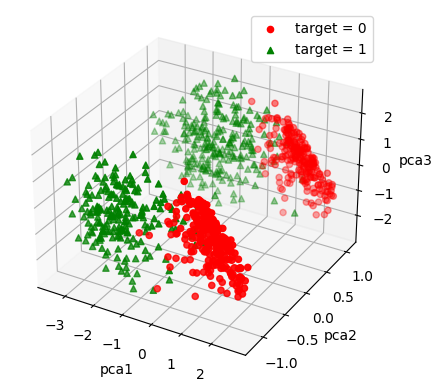

In [725]:
from cProfile import label


data_t0 = pca_data[pca_data["target"]==0]
data_t1 = pca_data[pca_data["target"]==1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_t0["pca1"], data_t0["pca2"], data_t0["pca3"], c='r', marker='o', label="target = 0")
ax.scatter(data_t1["pca1"], data_t1["pca2"], data_t1["pca3"], c='g', marker='^', label="target = 1")

ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_zlabel('pca3')
plt.legend()
plt.show()

## 1.2 Training

### Models

In [726]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [727]:
def print_accuracy(y_test, y_pred):
    print(f'Testing accuracy: {metrics.accuracy_score(y_test, y_pred)}')
    print(f'Testing precision = {metrics.precision_score(y_test, y_pred)}')
    print(f'Testing recall = {metrics.recall_score(y_test, y_pred)}')
    
### Naïve Bayes
def predict_nb(X_train, X_test, y_train, y_test):
    gnb = GaussianNB().fit(X_train, y_train)
    
    y_pred = gnb.predict(X_test)

    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    # print(df)
    print_accuracy(y_test, y_pred)

### Logistic regression
def predict_lr(X_train, X_test, y_train, y_test):
    grid_values = {'penalty': ['l2'], 
                   'C': [0.001,0.01,0.1,1,10,100,1000]}
    
    lr = GridSearchCV(estimator=LogisticRegression(max_iter=10000), cv=3, scoring=SCORING, param_grid=grid_values)
    lr.fit(X_train, y_train)
    
    lr_best = lr.best_estimator_
    y_pred = lr_best.predict(X_test)
    
    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    # print(df)
    print_accuracy(y_test, y_pred)

### KNN
def predict_knn(X_train, X_test, y_train, y_test):
    grid_values = {'n_neighbors':list(range(1, 11)),
              'weights':['uniform', 'distance'],
              'metric':['euclidean', 'manhattan', 'chebyshev', 'cosine']
              }

    knn = GridSearchCV(estimator=KNeighborsClassifier(), cv=3, scoring=SCORING, param_grid=grid_values)
    knn.fit(X_train, y_train)
    
    knn_best = knn.best_estimator_
    y_pred = knn_best.predict(X_test)

    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    # print(df)
    print_accuracy(y_test, y_pred)


Read the encoded data

In [728]:
dataset = pd.read_csv(ENCODED_DATA_PATH)
dataset = dataset.iloc[:, 1:]

# print(dataset)
target = dataset["target"]
dataset.drop("target", axis=1, inplace=True)

### Models without PCA

In [729]:
X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.2, random_state=1)

print("Naïve Bayes:")
predict_nb(X_train, X_test, y_train, y_test)
print("Logistic Regression:")
predict_lr(X_train, X_test, y_train, y_test)
print("KNN:")
predict_knn(X_train, X_test, y_train, y_test)

Naïve Bayes:
Testing accuracy: 0.972972972972973
Testing precision = 0.9666666666666667
Testing recall = 0.9775280898876404
Logistic Regression:
Testing accuracy: 0.9621621621621622
Testing precision = 0.9555555555555556
Testing recall = 0.9662921348314607
KNN:
Testing accuracy: 0.9513513513513514
Testing precision = 0.9761904761904762
Testing recall = 0.9213483146067416


### Model without countries

In [730]:
dataset_no_contr = dataset.drop("var3", axis=1)

X_train, X_test, y_train, y_test = train_test_split(dataset_no_contr, target, test_size=0.2, random_state=1)

print("Naïve Bayes:")
predict_nb(X_train, X_test, y_train, y_test)
print("Logistic Regression:")
predict_lr(X_train, X_test, y_train, y_test)
print("KNN:")
predict_knn(X_train, X_test, y_train, y_test)

Naïve Bayes:
Testing accuracy: 0.9513513513513514
Testing precision = 0.9545454545454546
Testing recall = 0.9438202247191011
Logistic Regression:
Testing accuracy: 0.9675675675675676
Testing precision = 0.9662921348314607
Testing recall = 0.9662921348314607
KNN:
Testing accuracy: 0.9513513513513514
Testing precision = 0.9761904761904762
Testing recall = 0.9213483146067416


### Models with PCA

In [731]:
pca_dataset, _ = pca(dataset, 4)

X_train, X_test, y_train, y_test = train_test_split(pca_dataset, target, test_size=0.2, random_state=1)

print("Naïve Bayes:")
predict_nb(X_train, X_test, y_train, y_test)
print("Logistic Regression:")
predict_lr(X_train, X_test, y_train, y_test)
print("KNN:")
predict_knn(X_train, X_test, y_train, y_test)

Variance captured by each component is 
 [43.92095253312737, 16.726864275542823, 13.78611785701563, 10.392015241373722, 7.988781932524709, 7.185268160415744]
Cumulative variance captured as we travel each component 
 [ 43.92095253  60.64781681  74.43393467  84.82594991  92.81473184
 100.        ]
Naïve Bayes:
Testing accuracy: 0.972972972972973
Testing precision = 0.9772727272727273
Testing recall = 0.9662921348314607
Logistic Regression:
Testing accuracy: 0.9621621621621622
Testing precision = 0.9555555555555556
Testing recall = 0.9662921348314607
KNN:
Testing accuracy: 0.972972972972973
Testing precision = 0.9883720930232558
Testing recall = 0.9550561797752809


### Models without countries and with PCA

In [732]:
pca_dataset, _ = pca(dataset_no_contr, 4)

X_train, X_test, y_train, y_test = train_test_split(pca_dataset, target, test_size=0.2, random_state=1)

print("Naïve Bayes:")
predict_nb(X_train, X_test, y_train, y_test)
print("Logistic Regression:")
predict_lr(X_train, X_test, y_train, y_test)
print("KNN:")
predict_knn(X_train, X_test, y_train, y_test)

Variance captured by each component is 
 [46.6969473316654, 20.07107256529182, 14.928187748812647, 9.598678839688652, 8.705113514541479]
Cumulative variance captured as we travel each component 
 [ 46.69694733  66.7680199   81.69620765  91.29488649 100.        ]
Naïve Bayes:
Testing accuracy: 0.9621621621621622
Testing precision = 0.9456521739130435
Testing recall = 0.9775280898876404
Logistic Regression:
Testing accuracy: 0.9567567567567568
Testing precision = 0.9879518072289156
Testing recall = 0.9213483146067416
KNN:
Testing accuracy: 0.9567567567567568
Testing precision = 0.9655172413793104
Testing recall = 0.9438202247191011


# 2. Theoretical

## 2.1 Regarding the Preprocessing

### Which regression model was the most effective for the missing values, and why?

The polynomial model yielded more accurate result

- Linear regression with polynomial coefficients
    - Mean Absolute Percentage Error: 0.14921567818592088
    - Mean Absolute Error: 15.436999813574154
    - Mean Squared Error: 495.9008222581229
    - Root Mean Squared Error: 22.268830733968116

compared to ridge regression

- Ridge regression
    - Mean Absolute Percentage Error: 0.20860892513670884
    - Mean Absolute Error: 20.069495142515294
    - Mean Squared Error: 583.4407476014106
    - Root Mean Squared Error: 24.15451816123457

nonetheless I opted for using a ridge regression model with linear parameters for imputing the data of _var4_

### What encoding technique did you use for encoding the categorical features, and why?

I used target encoding for encoding my categorical features since using one hot was proven to be suboptimal. My target encoding was implemented using the following formula:
$$\eta = \text{MinMaxScaler}\left(\frac{\text{\# of occurrence of target of a country} + \text{my\_noise(country)}}{\text{\# of occurrence of a country}}\right)$$


## 2.2 Regarding the training process

### Which classification model performed best, and why? (30 %)

Overall the Naïve Bayes proved to be a reliable baseline of performance fo the classification models

Naïve Bayes without PCA:

- Testing accuracy: 0.972972972972973
- Testing precision = 0.9666666666666667
- Testing recall = 0.9775280898876404

The only model that got comparably better results was 

KNN with PCA:

- Testing accuracy: 0.972972972972973
- Testing precision = 0.9883720930232558
- Testing recall = 0.9550561797752809

Somehow Logistic Regression did not achieve better results that Naïve Bayes

Logistic Regression with PCA:

- Testing accuracy: 0.9621621621621622
- Testing precision = 0.9555555555555556
- Testing recall = 0.9662921348314607

### What were the most critical features with regards to the classification, and why? (20 %)

_var1_, _var2_ and _var5_ turned out to be the most impactful features

### What features might be redundant or are not useful, and why? (20 %)

It turned out that _var3_ can be counted as a redundant feature. Removing it results in only $<5\%$ reduction in accuracy of the model 

_var7_ is also a redundant feature

### Did the dimensionality reduction by the PCA improve the model performance, and why? (20 %)

Yes it did. In my case it increased the testing precision of every model.

Dimensionality reduction can remove effectless columns that only introduce noise and result in overfitting 

### Additional research: 

(a) what is a multi-label learning problem? 

(b) suggest an example in which you can transform the given problem into a multi-label problem? Will the models work as it is in that case, or would some changes be required? (10 %)